In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
#loading data
gold_data=pd.read_csv(r"C:\Users\sharm\OneDrive\Documents\datasets\gld_price_data.csv")

In [3]:
#viewing top 5 
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#getting info about data
gold_data.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [5]:
#getting no. of rows and columns
gold_data.shape

(2290, 6)

In [6]:
#getting statisitcs of each column
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
#checking missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#finding correlation
co=gold_data.corr()

<AxesSubplot:>

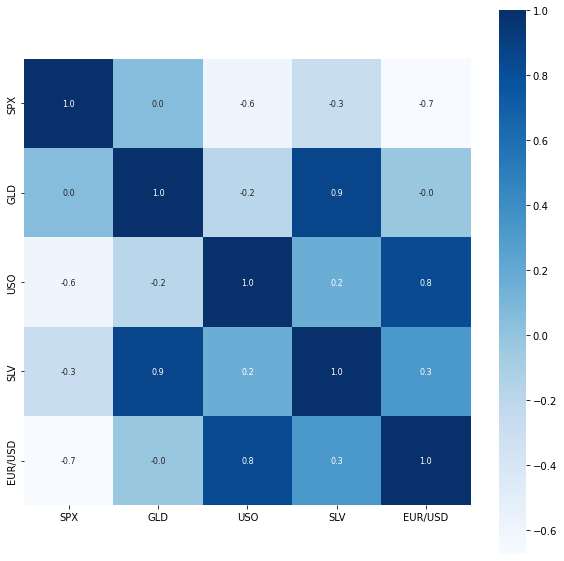

In [10]:
#constructing heatmap for correlation
plt.figure(figsize=(10,10))
sns.heatmap(co,square=True, annot=True, annot_kws={'size':8},cbar=True,fmt='.1f',cmap="Blues")


In [11]:
#correlation values of gold
co['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\sharm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

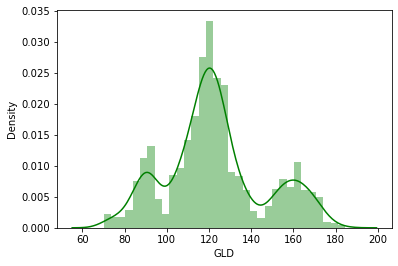

In [12]:
#CHECKING DISTRIBUTION OF GOLD PRICE
sns.distplot(gold_data['GLD'],color='Green')

In [13]:
#splottiong features and target
X=gold_data.drop(['GLD','Date'],axis=1)
Y=gold_data['GLD']

In [14]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [15]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [16]:
#Splitting data into training and testing data
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [18]:
#model training
reg=RandomForestRegressor(n_estimators=100)

In [19]:
#training model
reg.fit(X_train, Y_train)

RandomForestRegressor()

In [20]:
#prediction on test data
pred=reg.predict(X_test)
print(pred)

[164.1633004  127.52949893 124.23659941 119.5534989  125.94959885
  85.99729826 171.72650149 138.14599991 106.79490056 132.73890155
 120.62719928 124.77590056 143.39479908 104.63729997  80.86129925
 119.60499948 140.73950018  90.2335007   91.51369932 128.30730222
 125.64759964 148.3782006  117.12370171 153.09939928 129.36309927
 129.3047011  118.30490085 111.53780038 168.21750198 158.92569885
 125.97830151 154.10630188 127.0925995  122.6405978  116.48190165
 154.59340013 115.02389997 120.61060141 103.91860222 105.54990041
 134.43499886  85.49399938 155.46590091 121.21190026 122.21660081
 155.31750101 120.36560028 116.60843797 168.44020271 116.5057005
 138.39010131 161.64169841 158.86569988 153.10790103 123.7807002
 116.93820018 167.10680077 117.18279943 165.79720088  84.03899995
 121.36959925 122.15850011 119.89150036 172.04149885 118.61870026
 180.26869713 161.74950319 138.46060288 115.87429977  92.69020041
 171.99149996 117.70129993 117.52769856 125.62560002 146.91449985
  90.9874009

In [21]:
#R squared error
error_score=metrics.r2_score(Y_test,pred)
print("R square error:",error_score)

R square error: 0.9856080495272377


In [22]:
#converting y_test data into list 
Y_test=list(Y_test)

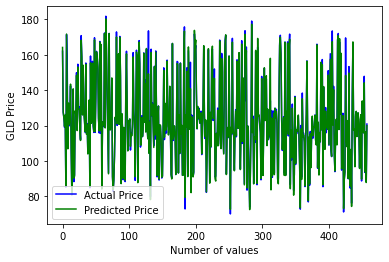

In [24]:
#Comparing actual vs Predicted values
plt.plot(Y_test,color='Blue',label='Actual Price')
plt.plot(pred,color='Green',label='Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()